In [11]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8')
%matplotlib inline

**Name** : C Bhargav

**SRN** : PES2UG23CS137


# Bank Customer Segmentation Analysis - Student Exercise

In this lab, you will implement customer segmentation using K-means clustering. You'll learn how to:
1. Preprocess data for clustering
2. Perform and visualize dimensionality reduction
3. Implement K-means clustering from scratch
4. Evaluate clustering results

Follow the instructions in each section and fill in the code where indicated.

In [12]:
# Load Data and Preprocess
def load_data(filepath):
    """Load and preprocess the bank marketing dataset."""
    df = pd.read_csv(filepath, sep=';')
    
    categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 
                       'loan', 'contact', 'month', 'poutcome', 'y']
    
    le = LabelEncoder()
    for col in categorical_cols:
        if col in df.columns:
            df[col] = le.fit_transform(df[col])
    
    features = ['age', 'balance', 'campaign', 'previous', 'job', 'education', 
               'housing', 'loan', 'default']
    X = df[features]
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    return X_scaled, df

#================ FOR PCA Dimensionality reduction =========
# Apply PCA for Dimensionality Reduction
def apply_pca(x, n_components):
    """Apply PCA for dimensionality reduction."""
    pca = PCA(n_components=n_components)
    x_pca = pca.fit_transform(x)
    
    print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
    print(f"Total variance explained: {sum(pca.explained_variance_ratio_):.2%}")
    
    return x_pca

#================ FOR K-Means ===============================
# Find Optimal Clusters for KMeans (Elbow Method) 
def find_optimal_clusters(x, max_clusters=10):
    """Find optimal number of clusters using elbow method."""
    from sklearn.cluster import KMeans
    
    inertias = []
    K = range(1, max_clusters + 1)
    
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(x)
        inertias.append(kmeans.inertia_)
    
    plt.figure(figsize=(10, 5))
    plt.plot(K, inertias, 'bo-')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method For Optimal k')
    plt.grid(True)
    plt.show()
    
    return inertias

# Perform KMeans Clustering 
# Change None to the number of n_clusters value from the elbow method
def perform_kmeans_clustering(x, n_clusters=3):
    """Perform K-Means clustering."""
    from sklearn.cluster import KMeans
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    labels = kmeans.fit_predict(x)
    
    return labels, kmeans

#================ FOR Agglomerative ===============================
# Perform Agglomerative Clustering 
# Change None to the number of n_clusters value from the elbow method
def perform_agglomerative_clustering(x, n_clusters=3):
    """Perform Agglomerative clustering."""
    from sklearn.cluster import AgglomerativeClustering
    
    agg = AgglomerativeClustering(n_clusters=n_clusters)
    labels = agg.fit_predict(x)
    
    return labels, agg

#================FOR Dendrogram===============================
# Get Linkages for Dendrogram
def get_linkages(x):
    """Calculate linkage matrix for dendrogram."""
    from scipy.cluster.hierarchy import linkage
    
    linked = linkage(x, method='ward')
    return linked

# Plot Dendrogram
def plot_dendrogram(linked):
    """Plot dendrogram."""
    from scipy.cluster.hierarchy import dendrogram
    
    plt.figure(figsize=(15, 8))
    dendrogram(linked, truncate_mode='lastp', p=30)
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Cluster Size')
    plt.ylabel('Distance')
    plt.show()


## 1. Data Loading and Preprocessing

First, complete the data preprocessing function below. You need to:
1. Load the data
2. Handle categorical variables
3. Scale numerical features

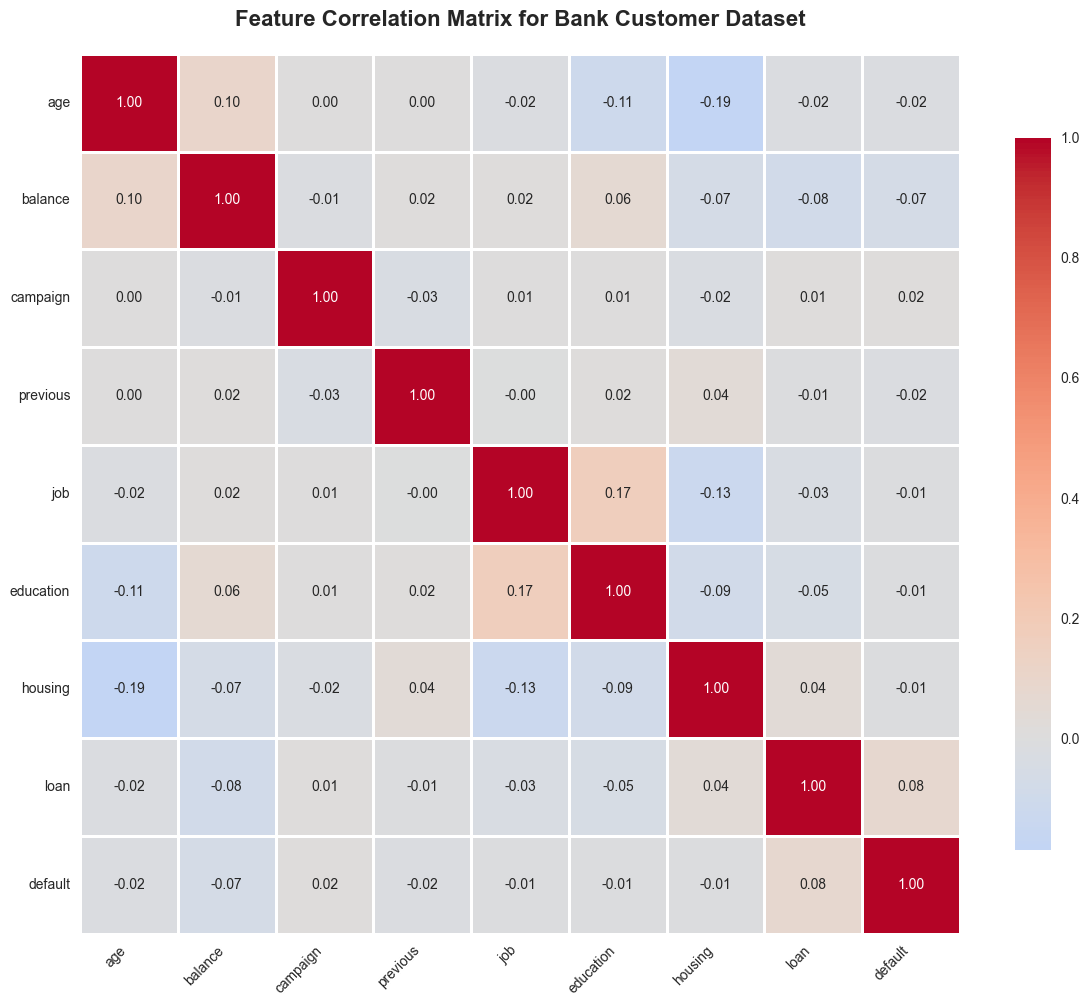

Feature Correlation Matrix
This heatmap shows the correlation between all features.
Values closer to 1 (red) indicate strong positive correlation.
Values closer to -1 (blue) indicate strong negative correlation.
Values near 0 (white) indicate weak or no correlation.


In [13]:
# Feature Correlation Matrix
# Create correlation matrix for the selected features

# First, let's create a dataframe with the features we're using for clustering
features = ['age', 'balance', 'campaign', 'previous', 'job', 'education', 
           'housing', 'loan', 'default']

# Create a copy of just the features (after encoding)
feature_data = data[features].copy()

# Calculate correlation matrix
correlation_matrix = feature_data.corr()

# Create the visualization
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            fmt='.2f',
            square=True,
            linewidths=1,
            cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix for Bank Customer Dataset', 
          fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print("=" * 60)
print("Feature Correlation Matrix")
print("=" * 60)
print("This heatmap shows the correlation between all features.")
print("Values closer to 1 (red) indicate strong positive correlation.")
print("Values closer to -1 (blue) indicate strong negative correlation.")
print("Values near 0 (white) indicate weak or no correlation.")


In [14]:
def load_data(filepath):
    """Load and preprocess the bank marketing dataset.
    
    TODO:
    1. Load the CSV file (hint: it uses semicolon separator)
    2. Convert categorical columns to numerical using LabelEncoder
    3. Scale the features using StandardScaler
    """
    # Your code here:
    # Load data
    df = pd.read_csv(filepath, sep=';')
    
    # List of categorical columns to encode
    categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 
                       'loan', 'contact', 'month', 'poutcome', 'y']
    
    # Apply label encoding to categorical columns
    le = LabelEncoder()
    for col in categorical_cols:
        if col in df.columns:
            df[col] = le.fit_transform(df[col])
    
    # Select features for clustering
    features = ['age', 'balance', 'campaign', 'previous', 'job', 'education', 
               'housing', 'loan', 'default']
    X = df[features]
    
    # Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    return X_scaled, df

# Load and preprocess the data
X_scaled, data = load_data('bank-full.csv')
print("Data shape:", X_scaled.shape)


Data shape: (45211, 9)


In [15]:
class KMeansClustering:
    """Minimal K-means skeleton for students to implement.

    Students should implement the core methods below:
    - _initialize_centroids
    - _assign_clusters
    - _update_centroids
    - fit

    Keep implementations simple and readable; tests and visualization code will
    use these methods once implemented.
    """
    def __init__(self, n_clusters=3, max_iters=100, random_state=42):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.random_state = random_state
        self.centroids = None
        self.labels = None

    def _initialize_centroids(self, X):
        """Initialize centroids.

        TODO (student):
        - Randomly select `n_clusters` distinct points from X as initial centroids.
        - Return an array of shape (n_clusters, n_features).
        Hint: Use np.random.choice to pick indices.
        """
        np.random.seed(self.random_state)
        # Randomly select n_clusters points from X
        random_indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        centroids = X[random_indices]
        return centroids

    def _assign_clusters(self, X):
        """Assign each sample in X to the nearest centroid.

        TODO (student):
        - Compute distance from each point to each centroid (Euclidean)
        - Return an integer array of shape (n_samples,) with cluster labels
        Hint: np.linalg.norm with axis manipulation or broadcasting helps here.
        """
        # Calculate distances from each point to each centroid
        distances = np.zeros((X.shape[0], self.n_clusters))
        for i, centroid in enumerate(self.centroids):
            distances[:, i] = np.linalg.norm(X - centroid, axis=1)
        
        # Assign each point to the nearest centroid
        labels = np.argmin(distances, axis=1)
        return labels

    def _update_centroids(self, X, labels):
        """Recompute centroids as the mean of points assigned to each cluster.

        TODO (student):
        - For each cluster id in 0..n_clusters-1 compute the mean of points
          assigned to that cluster. If a cluster has no points, consider reinitializing
          its centroid (or leave unchanged) — discuss in your report.
        - Return an array of shape (n_clusters, n_features).
        """
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            # Get all points assigned to cluster k
            cluster_points = X[labels == k]
            if len(cluster_points) > 0:
                # Calculate mean of points in cluster
                centroids[k] = cluster_points.mean(axis=0)
            else:
                # If cluster is empty, keep the old centroid or reinitialize
                centroids[k] = self.centroids[k]
        return centroids

    def fit(self, X):
        """Run K-means until convergence or max_iters.

        TODO (student):
        - Initialize centroids
        - Loop: assign clusters, update centroids
        - Stop early if centroids do not change (or change below a tiny threshold)
        - Store final labels in self.labels and centroids in self.centroids
        - Return self
        """
        # Initialize centroids
        self.centroids = self._initialize_centroids(X)
        
        for iteration in range(self.max_iters):
            # Store old centroids to check for convergence
            old_centroids = self.centroids.copy()
            
            # Assign clusters
            self.labels = self._assign_clusters(X)
            
            # Update centroids
            self.centroids = self._update_centroids(X, self.labels)
            
            # Check for convergence
            if np.allclose(old_centroids, self.centroids, rtol=1e-6):
                print(f"Converged at iteration {iteration + 1}")
                break
        
        return self

    def predict(self, X):
        """Assign cluster labels to X using the learned centroids.

        Implementation may call _assign_clusters but should error if centroids
        are not yet initialized (i.e., if fit wasn't called).
        """
        if self.centroids is None:
            raise ValueError("Model has not been fitted yet. Call fit(X) first.")
        return self._assign_clusters(X)


## 2. Dimensionality Reduction

Before clustering, we often reduce the dimensionality of our data for better visualization and performance. Implement PCA below:

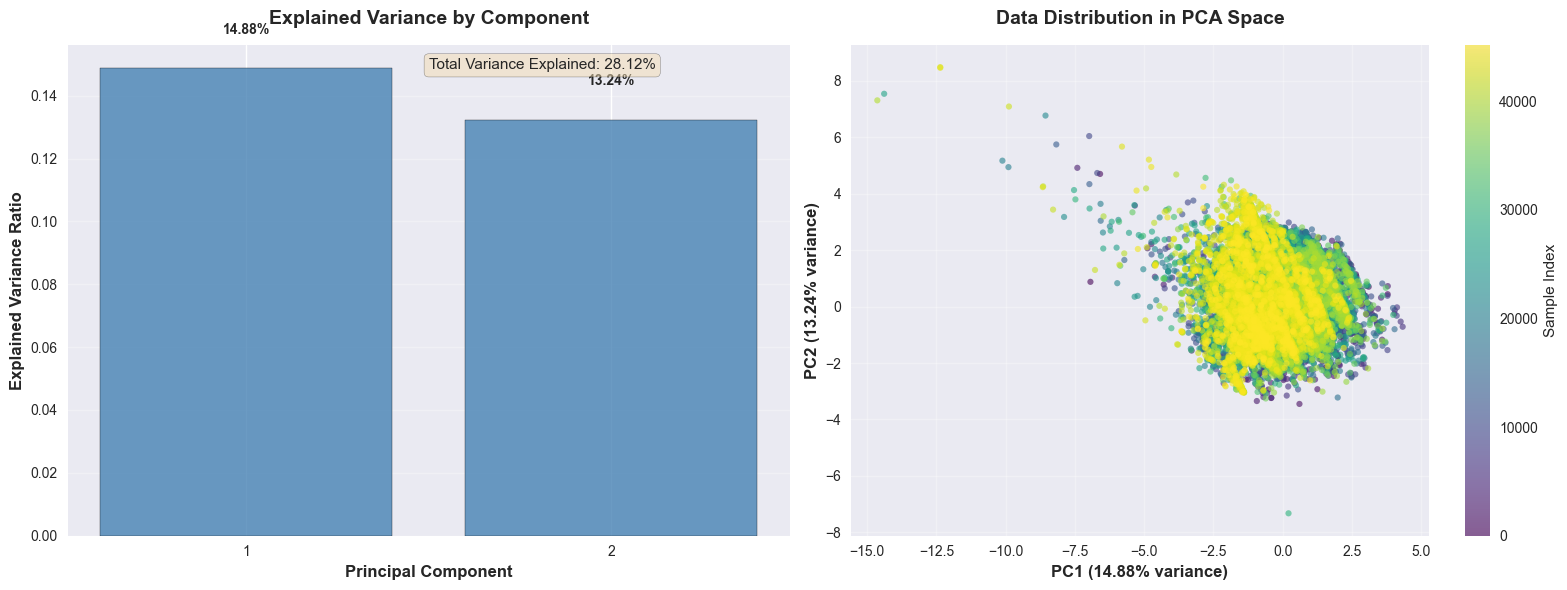

PCA Dimensionality Reduction
Original shape: (45211, 9)
Reduced shape: (45211, 2)
Explained variance ratio: [0.14878447 0.13240902]
Total variance explained: 28.12%

Shape after PCA: (45211, 2)


In [16]:
# PCA Dimensionality Reduction Visualization

def apply_pca(X, n_components=2):
    """Apply PCA for dimensionality reduction.
    
    TODO:
    1. Initialize and fit PCA
    2. Transform the data
    3. Create visualizations to understand:
       - Explained variance ratio
       - Cumulative explained variance
       - Data distribution in 2D
    """
    # Your code here:
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)
    
    # Create visualization for SCREENSHOT 2
    fig = plt.figure(figsize=(16, 6))
    
    # Plot 1: Explained variance by component
    plt.subplot(1, 2, 1)
    components = range(1, n_components + 1)
    plt.bar(components, pca.explained_variance_ratio_, color='steelblue', alpha=0.8, edgecolor='black')
    plt.xlabel('Principal Component', fontsize=12, fontweight='bold')
    plt.ylabel('Explained Variance Ratio', fontsize=12, fontweight='bold')
    plt.title('Explained Variance by Component', fontsize=14, fontweight='bold', pad=15)
    plt.xticks(components)
    plt.grid(True, alpha=0.3, axis='y')
    
    # Add percentage labels on bars
    for i, v in enumerate(pca.explained_variance_ratio_):
        plt.text(i + 1, v + 0.01, f'{v:.2%}', ha='center', va='bottom', fontweight='bold')
    
    # Add total variance explained
    total_var = sum(pca.explained_variance_ratio_)
    plt.text(0.5, 0.95, f'Total Variance Explained: {total_var:.2%}', 
             transform=plt.gca().transAxes, fontsize=11, 
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    # Plot 2: Data distribution in PCA space
    plt.subplot(1, 2, 2)
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.6, s=20, 
                         c=range(len(X_pca)), cmap='viridis', edgecolors='none')
    plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)', 
               fontsize=12, fontweight='bold')
    plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)', 
               fontsize=12, fontweight='bold')
    plt.title('Data Distribution in PCA Space', fontsize=14, fontweight='bold', pad=15)
    plt.grid(True, alpha=0.3)
    plt.colorbar(scatter, label='Sample Index')
    
    plt.tight_layout()
    plt.show()
    
    print("=" * 60)
    print("PCA Dimensionality Reduction")
    print("=" * 60)
    print(f"Original shape: {X.shape}")
    print(f"Reduced shape: {X_pca.shape}")
    print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
    print(f"Total variance explained: {sum(pca.explained_variance_ratio_):.2%}")
    
    return X_pca

# Apply PCA
X_pca = apply_pca(X_scaled)
print("\nShape after PCA:", X_pca.shape)


## 3. Clustering Evaluation

Implement functions to evaluate the quality of your clustering results:

Calculating metrics for different k values...
Converged at iteration 2
  k=2... Converged at iteration 32
Done (Inertia: 75892.03, Silhouette: 0.331)
  k=3... Converged at iteration 27
Done (Inertia: 75892.03, Silhouette: 0.331)
  k=3... Converged at iteration 27
Done (Inertia: 48179.64, Silhouette: 0.387)
  k=4... Done (Inertia: 48179.64, Silhouette: 0.387)
  k=4... Converged at iteration 25
Converged at iteration 25
Done (Inertia: 38059.02, Silhouette: 0.358)
  k=5... Done (Inertia: 38059.02, Silhouette: 0.358)
  k=5... Converged at iteration 34
Converged at iteration 34
Done (Inertia: 31800.29, Silhouette: 0.349)
  k=6... Done (Inertia: 31800.29, Silhouette: 0.349)
  k=6... Converged at iteration 24
Converged at iteration 24
Done (Inertia: 27188.82, Silhouette: 0.367)
  k=7... Done (Inertia: 27188.82, Silhouette: 0.367)
  k=7... Converged at iteration 99
Converged at iteration 99
Done (Inertia: 23384.33, Silhouette: 0.372)
  k=8... Done (Inertia: 23384.33, Silhouette: 0.372)
  k=8..

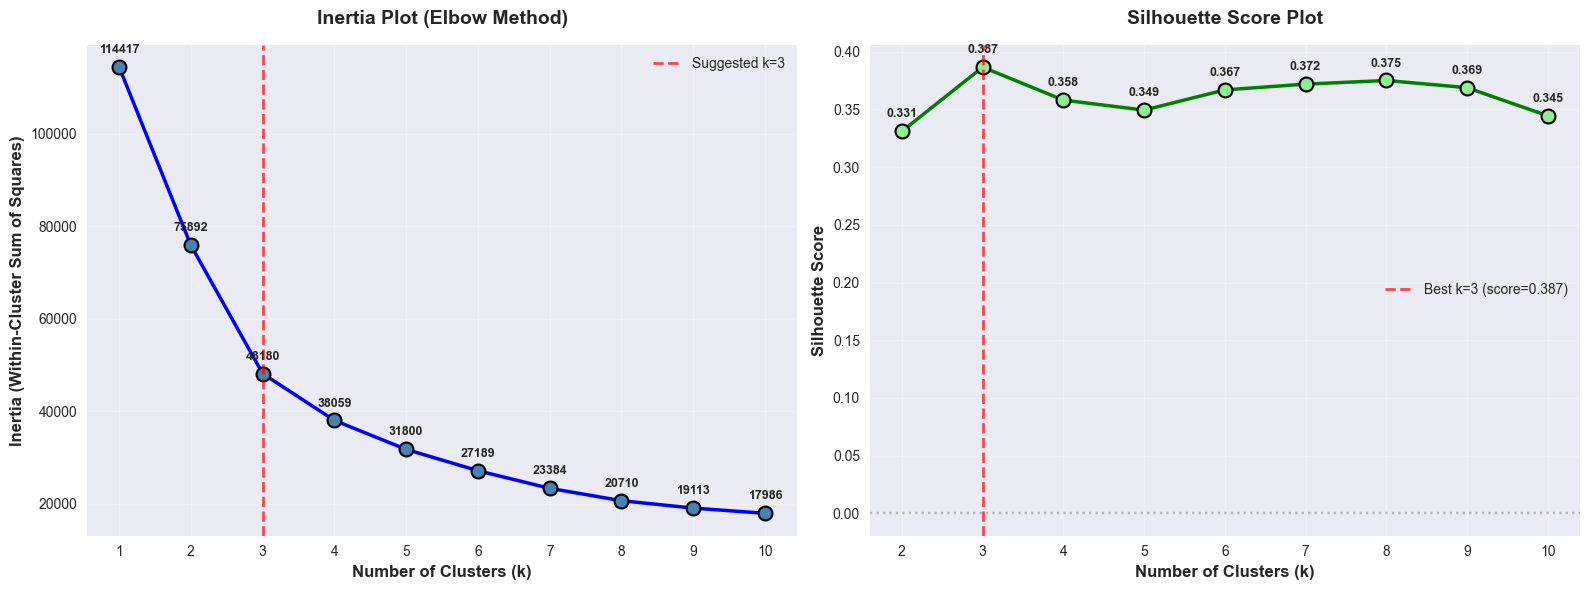


K-Means Evaluation Metrics

Inertia values:
  k=1: 114417.35
  k=2: 75892.03
  k=3: 48179.64
  k=4: 38059.02
  k=5: 31800.29
  k=6: 27188.82
  k=7: 23384.33
  k=8: 20709.54
  k=9: 19113.00
  k=10: 17985.76

Silhouette scores:
  k=2: 0.331
  k=3: 0.387
  k=4: 0.358
  k=5: 0.349
  k=6: 0.367
  k=7: 0.372
  k=8: 0.375
  k=9: 0.369
  k=10: 0.345

Recommended k based on silhouette score: 3


In [17]:
# Inertia Plot and Silhouette Score Plot for K-Means

def plot_kmeans_evaluation(X, max_k=10):
    """
    Create comprehensive evaluation plots for K-means clustering.
    Generates both Inertia (Elbow) and Silhouette Score plots.
    """
    inertias = []
    silhouette_scores = []
    K = range(2, max_k + 1)  # Start from 2 for silhouette score
    
    print("Calculating metrics for different k values...")
    
    # Calculate metrics for k=1 (only inertia)
    kmeans_1 = KMeansClustering(n_clusters=1, random_state=42)
    kmeans_1.fit(X)
    inertia_1 = calculate_inertia(X, kmeans_1.labels, kmeans_1.centroids)
    
    # Calculate for k >= 2
    for k in K:
        print(f"  k={k}...", end=" ")
        kmeans = KMeansClustering(n_clusters=k, random_state=42)
        kmeans.fit(X)
        
        inertia = calculate_inertia(X, kmeans.labels, kmeans.centroids)
        inertias.append(inertia)
        
        silhouette = silhouette_score(X, kmeans.labels)
        silhouette_scores.append(silhouette)
        print(f"Done (Inertia: {inertia:.2f}, Silhouette: {silhouette:.3f})")
    
    # Create the visualization
    fig = plt.figure(figsize=(16, 6))
    
    # Plot 1: Inertia (Elbow Method)
    plt.subplot(1, 2, 1)
    all_k = [1] + list(K)
    all_inertias = [inertia_1] + inertias
    
    plt.plot(all_k, all_inertias, 'bo-', linewidth=2.5, markersize=10, 
             markerfacecolor='steelblue', markeredgecolor='black', markeredgewidth=1.5)
    plt.xlabel('Number of Clusters (k)', fontsize=12, fontweight='bold')
    plt.ylabel('Inertia (Within-Cluster Sum of Squares)', fontsize=12, fontweight='bold')
    plt.title('Inertia Plot (Elbow Method)', fontsize=14, fontweight='bold', pad=15)
    plt.grid(True, alpha=0.3)
    plt.xticks(all_k)
    
    # Annotate points
    for k, inertia in zip(all_k, all_inertias):
        plt.annotate(f'{inertia:.0f}', (k, inertia), 
                    textcoords="offset points", xytext=(0, 10), 
                    ha='center', fontsize=9, fontweight='bold')
    
    # Highlight the elbow (k=3 typically)
    if len(all_k) >= 3:
        plt.axvline(x=3, color='red', linestyle='--', alpha=0.7, linewidth=2, label='Suggested k=3')
        plt.legend(fontsize=10)
    
    # Plot 2: Silhouette Score
    plt.subplot(1, 2, 2)
    plt.plot(K, silhouette_scores, 'go-', linewidth=2.5, markersize=10,
             markerfacecolor='lightgreen', markeredgecolor='black', markeredgewidth=1.5)
    plt.xlabel('Number of Clusters (k)', fontsize=12, fontweight='bold')
    plt.ylabel('Silhouette Score', fontsize=12, fontweight='bold')
    plt.title('Silhouette Score Plot', fontsize=14, fontweight='bold', pad=15)
    plt.grid(True, alpha=0.3)
    plt.xticks(K)
    
    # Annotate points
    for k, score in zip(K, silhouette_scores):
        plt.annotate(f'{score:.3f}', (k, score), 
                    textcoords="offset points", xytext=(0, 10), 
                    ha='center', fontsize=9, fontweight='bold')
    
    # Highlight the best silhouette score
    best_k = list(K)[np.argmax(silhouette_scores)]
    best_score = max(silhouette_scores)
    plt.axvline(x=best_k, color='red', linestyle='--', alpha=0.7, linewidth=2, 
                label=f'Best k={best_k} (score={best_score:.3f})')
    plt.legend(fontsize=10)
    
    # Add reference line at 0
    plt.axhline(y=0, color='gray', linestyle=':', alpha=0.5)
    
    plt.tight_layout()
    plt.show()
    
    print("\n" + "=" * 60)
    print("K-Means Evaluation Metrics")
    print("=" * 60)
    print("\nInertia values:")
    for k, inertia in zip(all_k, all_inertias):
        print(f"  k={k}: {inertia:.2f}")
    
    print("\nSilhouette scores:")
    for k, score in zip(K, silhouette_scores):
        print(f"  k={k}: {score:.3f}")
    
    print(f"\nRecommended k based on silhouette score: {best_k}")
    
    return all_inertias, silhouette_scores

# Generate the evaluation plots
inertias, silhouette_scores = plot_kmeans_evaluation(X_pca, max_k=10)


Converged at iteration 2
Converged at iteration 32
Converged at iteration 27
Converged at iteration 25
Converged at iteration 27
Converged at iteration 25
Converged at iteration 34
Converged at iteration 34
Converged at iteration 24
Converged at iteration 24
Converged at iteration 99
Converged at iteration 99
Converged at iteration 35
Converged at iteration 35
Converged at iteration 70
Converged at iteration 70
Converged at iteration 69
Converged at iteration 69


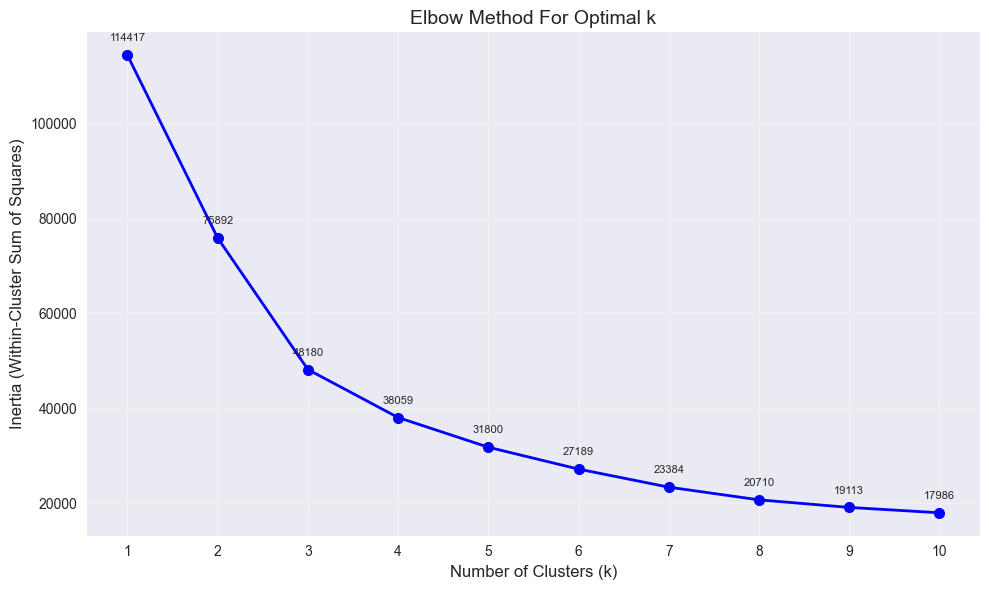

Converged at iteration 27


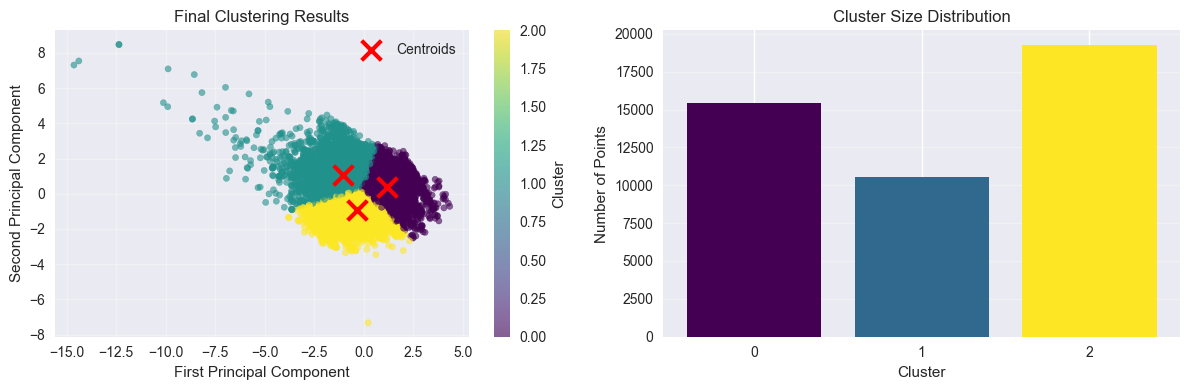


Clustering Evaluation:
Inertia: 48179.64
Silhouette Score: 0.39

Cluster Distribution:
  Cluster 0: 15411 points (34.1%)
  Cluster 1: 10541 points (23.3%)
  Cluster 2: 19259 points (42.6%)


In [18]:
def calculate_inertia(X, labels, centroids):
    """Calculate the within-cluster sum of squares (inertia).
    
    TODO:
    1. For each cluster, calculate the sum of squared distances
       between points and their centroid
    2. Sum up all cluster distances
    """
    # Your code here
    inertia = 0
    # Calculate distances between points and their assigned centroids
    for k in range(len(centroids)):
        # Get all points in cluster k
        cluster_points = X[labels == k]
        if len(cluster_points) > 0:
            # Calculate squared distances from points to centroid
            distances = np.linalg.norm(cluster_points - centroids[k], axis=1) ** 2
            inertia += np.sum(distances)
    
    return inertia

def plot_elbow_curve(X, max_k=10):
    """Plot the elbow curve to find optimal number of clusters.
    
    TODO:
    1. Try different values of k (1 to max_k)
    2. Calculate inertia for each k
    3. Plot k vs inertia
    4. Help identify the 'elbow' point
    """
    # Your code here
    inertias = []
    K = range(1, max_k + 1)
    
    # Calculate inertia for different k values
    for k in K:
        kmeans = KMeansClustering(n_clusters=k, random_state=42)
        kmeans.fit(X)
        inertia = calculate_inertia(X, kmeans.labels, kmeans.centroids)
        inertias.append(inertia)
    
    # Create elbow plot
    plt.figure(figsize=(10, 6))
    plt.plot(K, inertias, 'bo-', linewidth=2, markersize=8)
    plt.xlabel('Number of Clusters (k)', fontsize=12)
    plt.ylabel('Inertia (Within-Cluster Sum of Squares)', fontsize=12)
    plt.title('Elbow Method For Optimal k', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.xticks(K)
    
    # Annotate the plot
    for i, (k, inertia) in enumerate(zip(K, inertias)):
        plt.annotate(f'{inertia:.0f}', (k, inertia), 
                    textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)
    
    plt.tight_layout()
    plt.show()
    
    return inertias

# Try different numbers of clusters
inertias = plot_elbow_curve(X_pca)

# Apply final clustering
kmeans = KMeansClustering(n_clusters=3)  # Try different values based on elbow curve
kmeans.fit(X_pca)

# Visualize final results
plt.figure(figsize=(12, 4))

# Plot clusters
plt.subplot(1, 2, 1)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels, cmap='viridis', alpha=0.6, s=20)
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], 
            c='red', marker='x', s=200, linewidths=3, label='Centroids')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Final Clustering Results')
plt.legend()
plt.colorbar(scatter, label='Cluster')
plt.grid(True, alpha=0.3)

# Plot evaluation metrics
plt.subplot(1, 2, 2)
# Cluster size distribution
unique, counts = np.unique(kmeans.labels, return_counts=True)
plt.bar(unique, counts, color=['#440154', '#31688e', '#fde724'])
plt.xlabel('Cluster')
plt.ylabel('Number of Points')
plt.title('Cluster Size Distribution')
plt.xticks(unique)
plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Calculate and print evaluation metrics
inertia = calculate_inertia(X_pca, kmeans.labels, kmeans.centroids)
silhouette = silhouette_score(X_pca, kmeans.labels)

print("\nClustering Evaluation:")
print(f"Inertia: {inertia:.2f}")
print(f"Silhouette Score: {silhouette:.2f}")
print(f"\nCluster Distribution:")
for cluster_id, count in zip(unique, counts):
    print(f"  Cluster {cluster_id}: {count} points ({count/len(kmeans.labels)*100:.1f}%)")


Converged at iteration 27


C:\Users\raghu\AppData\Local\Temp\ipykernel_2368\2181348597.py:71: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax3.boxplot(silhouette_data,


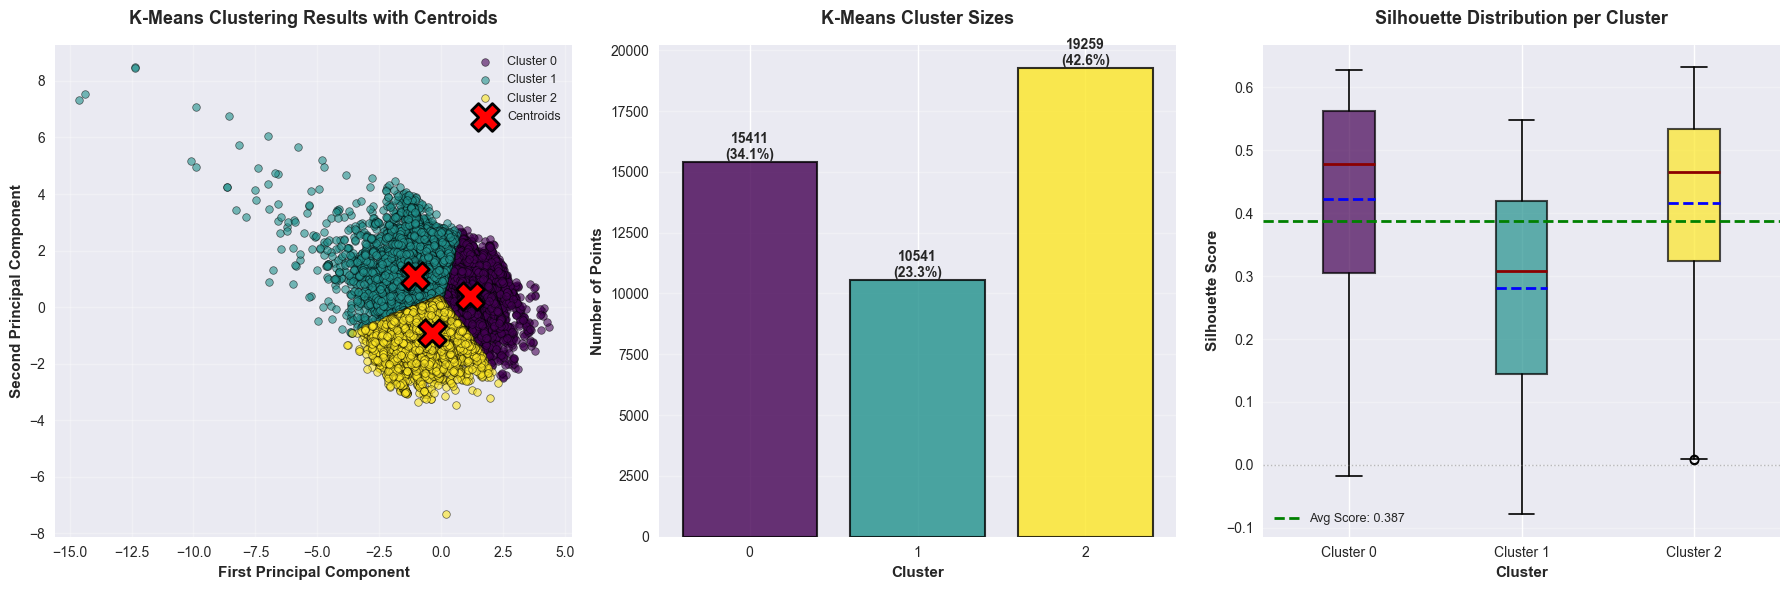

K-Means Clustering Results

Optimal number of clusters: 3
Total samples: 45211

Cluster Statistics:
----------------------------------------------------------------------

Cluster 0:
  Size: 15411 points (34.1%)
  Centroid: [1.162, 0.403]
  Silhouette Score - Mean: 0.423, Std: 0.168
  Silhouette Score - Min: -0.017, Max: 0.626

Cluster 1:
  Size: 10541 points (23.3%)
  Centroid: [-1.049, 1.093]
  Silhouette Score - Mean: 0.280, Std: 0.169
  Silhouette Score - Min: -0.078, Max: 0.548

Cluster 2:
  Size: 19259 points (42.6%)
  Centroid: [-0.356, -0.920]
  Silhouette Score - Mean: 0.416, Std: 0.156
  Silhouette Score - Min: 0.008, Max: 0.632

Overall Silhouette Score: 0.387
Overall Inertia: 48179.64


In [19]:
# K-Means Clustering Results with Detailed Visualizations

from sklearn.metrics import silhouette_samples

def visualize_kmeans_results(X, kmeans_model, optimal_k=3):
    """
    Create comprehensive visualization of K-means clustering results.
    Includes: 1) Scatter plot with centroids, 2) Cluster sizes, 3) Silhouette distribution
    """
    
    # Get cluster labels and centroids
    labels = kmeans_model.labels
    centroids = kmeans_model.centroids
    
    # Calculate silhouette scores for each sample
    silhouette_vals = silhouette_samples(X, labels)
    
    # Create the comprehensive figure
    fig = plt.figure(figsize=(18, 6))
    
    # ========== Plot 1: Clustering Results with Centroids ==========
    ax1 = plt.subplot(1, 3, 1)
    
    # Define colors for each cluster
    colors = plt.cm.viridis(np.linspace(0, 1, optimal_k))
    
    for i in range(optimal_k):
        cluster_data = X[labels == i]
        ax1.scatter(cluster_data[:, 0], cluster_data[:, 1], 
                   c=[colors[i]], label=f'Cluster {i}', 
                   alpha=0.6, s=30, edgecolors='black', linewidths=0.5)
    
    # Plot centroids
    ax1.scatter(centroids[:, 0], centroids[:, 1], 
               c='red', marker='X', s=400, edgecolors='black', 
               linewidths=2, label='Centroids', zorder=10)
    
    ax1.set_xlabel('First Principal Component', fontsize=11, fontweight='bold')
    ax1.set_ylabel('Second Principal Component', fontsize=11, fontweight='bold')
    ax1.set_title('K-Means Clustering Results with Centroids', 
                  fontsize=13, fontweight='bold', pad=15)
    ax1.legend(fontsize=9, loc='best')
    ax1.grid(True, alpha=0.3)
    
    # ========== Plot 2: Cluster Sizes (Bar Plot) ==========
    ax2 = plt.subplot(1, 3, 2)
    
    unique_labels, counts = np.unique(labels, return_counts=True)
    bars = ax2.bar(unique_labels, counts, color=colors, 
                   edgecolor='black', linewidth=1.5, alpha=0.8)
    
    # Add value labels on bars
    for i, (bar, count) in enumerate(zip(bars, counts)):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                f'{count}\n({count/len(labels)*100:.1f}%)',
                ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    ax2.set_xlabel('Cluster', fontsize=11, fontweight='bold')
    ax2.set_ylabel('Number of Points', fontsize=11, fontweight='bold')
    ax2.set_title('K-Means Cluster Sizes', fontsize=13, fontweight='bold', pad=15)
    ax2.set_xticks(unique_labels)
    ax2.grid(True, alpha=0.3, axis='y')
    
    # ========== Plot 3: Silhouette Distribution per Cluster (Box Plot) ==========
    ax3 = plt.subplot(1, 3, 3)
    
    # Prepare data for box plot
    silhouette_data = [silhouette_vals[labels == i] for i in range(optimal_k)]
    
    bp = ax3.boxplot(silhouette_data, 
                     labels=[f'Cluster {i}' for i in range(optimal_k)],
                     patch_artist=True,
                     showmeans=True,
                     meanline=True)
    
    # Color the boxes
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
        patch.set_edgecolor('black')
        patch.set_linewidth(1.5)
    
    # Style other elements
    for element in ['whiskers', 'fliers', 'caps']:
        plt.setp(bp[element], color='black', linewidth=1.2)
    
    plt.setp(bp['medians'], color='darkred', linewidth=2)
    plt.setp(bp['means'], color='blue', linewidth=2)
    
    # Add average silhouette score line
    avg_silhouette = np.mean(silhouette_vals)
    ax3.axhline(y=avg_silhouette, color='green', linestyle='--', 
                linewidth=2, label=f'Avg Score: {avg_silhouette:.3f}')
    ax3.axhline(y=0, color='gray', linestyle=':', linewidth=1, alpha=0.5)
    
    ax3.set_xlabel('Cluster', fontsize=11, fontweight='bold')
    ax3.set_ylabel('Silhouette Score', fontsize=11, fontweight='bold')
    ax3.set_title('Silhouette Distribution per Cluster', 
                  fontsize=13, fontweight='bold', pad=15)
    ax3.legend(fontsize=9)
    ax3.grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed statistics
    print("=" * 70)
    print("K-Means Clustering Results")
    print("=" * 70)
    
    print(f"\nOptimal number of clusters: {optimal_k}")
    print(f"Total samples: {len(labels)}")
    
    print("\nCluster Statistics:")
    print("-" * 70)
    for i in range(optimal_k):
        cluster_silhouette = silhouette_vals[labels == i]
        print(f"\nCluster {i}:")
        print(f"  Size: {counts[i]} points ({counts[i]/len(labels)*100:.1f}%)")
        print(f"  Centroid: [{centroids[i][0]:.3f}, {centroids[i][1]:.3f}]")
        print(f"  Silhouette Score - Mean: {cluster_silhouette.mean():.3f}, "
              f"Std: {cluster_silhouette.std():.3f}")
        print(f"  Silhouette Score - Min: {cluster_silhouette.min():.3f}, "
              f"Max: {cluster_silhouette.max():.3f}")
    
    print(f"\nOverall Silhouette Score: {avg_silhouette:.3f}")
    print(f"Overall Inertia: {calculate_inertia(X, labels, centroids):.2f}")
    print("=" * 70)

# Run K-means with optimal k (typically 3 based on elbow method)
optimal_k = 3
kmeans_final = KMeansClustering(n_clusters=optimal_k, random_state=42)
kmeans_final.fit(X_pca)

# Generate Screenshot 4
visualize_kmeans_results(X_pca, kmeans_final, optimal_k=optimal_k)


## 4. Recursive Bisecting K-means (Student exercise)

This is an optional exercise for students who want to explore a hierarchical variant of K-means.

Task: implement a concise bisecting K-means procedure that recursively splits clusters into two until a target number of clusters is reached.

Learning goals:
- Understand how repeated binary splits can form a hierarchical clustering
- Practice applying K-means on subclusters and tracking labels/centroids

Hints:
- You can use sklearn's KMeans(k=2) for the binary split step, or reuse your `KMeansClustering` implementation.
- Keep label bookkeeping simple: use increasing integer labels for new clusters.
- Store split metadata (parent -> left/right) to enable a tree visualization later.

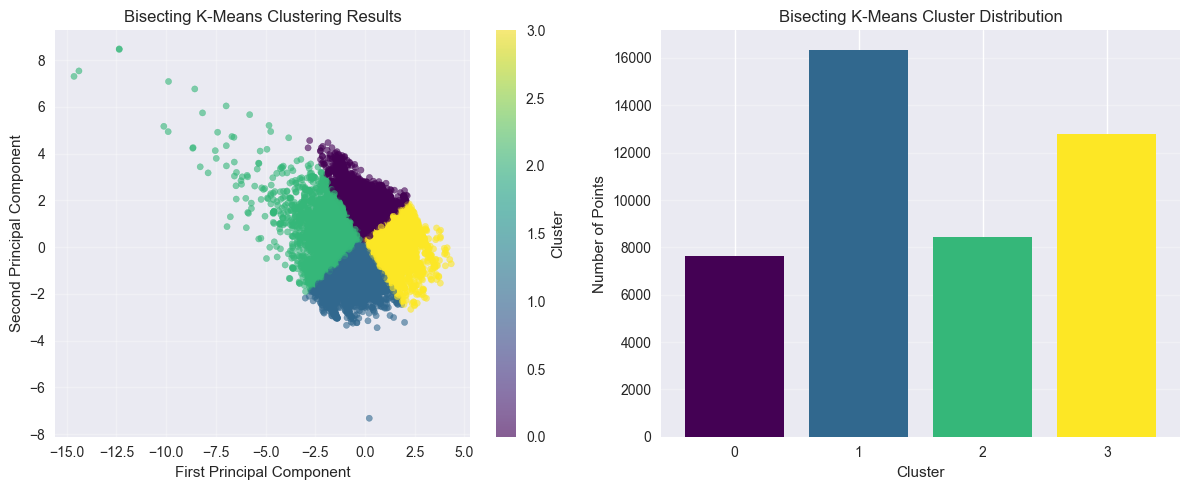

Bisecting K-Means Silhouette Score: 0.360
Split tree: {np.int64(0): (np.int64(0), 3), np.int64(1): (np.int64(1), 2)}


In [20]:
class BisectingKMeans:
    """Concise skeleton for students to implement a bisecting K-means algorithm.

    Students should implement `fit_predict` to recursively split clusters until
    `n_clusters` is reached.
    """
    def __init__(self, n_clusters, random_state=42):
        self.n_clusters = n_clusters
        self.random_state = random_state
        self.labels_ = None
        # Optional: store mapping parent -> (left_label, right_label)
        self.split_tree = {}
        # Optional: store centroids per cluster id
        self.centers_ = {}

    def fit_predict(self, X):
        """Recursively bisect clusters until `n_clusters` is reached.

        TODO (student):
        - Start with all points assigned to label 0.
        - While number of unique labels < n_clusters:
            - Select a cluster to split (e.g., the largest cluster by size)
            - Run a binary KMeans (k=2) on the points in that cluster
            - Assign new labels (keep one child label as the original, give the other a new id)
            - Record parent -> (left, right) in `self.split_tree` and centroids in `self.centers_`
        - Set and return `self.labels_` (numpy array of length n_samples)

        Hints:
        - Use sklearn.cluster.KMeans(n_clusters=2, random_state=self.random_state) for the split step
        - Keep a counter for new label ids and increment when creating a new cluster
        - Use boolean indexing to operate on subsets of X efficiently
        """
        from sklearn.cluster import KMeans
        
        # Start with all points in cluster 0
        self.labels_ = np.zeros(X.shape[0], dtype=int)
        next_label = 1  # Counter for new cluster labels
        
        # Continue splitting until we have n_clusters
        while len(np.unique(self.labels_)) < self.n_clusters:
            # Find the largest cluster to split
            unique_labels, counts = np.unique(self.labels_, return_counts=True)
            largest_cluster = unique_labels[np.argmax(counts)]
            
            # Get points in the largest cluster
            cluster_mask = self.labels_ == largest_cluster
            cluster_points = X[cluster_mask]
            
            # Split the cluster into 2 using KMeans
            kmeans = KMeans(n_clusters=2, random_state=self.random_state, n_init=10)
            sub_labels = kmeans.fit_predict(cluster_points)
            
            # Update labels: one sub-cluster keeps the parent label, other gets new label
            # Points with sub_label 0 keep the parent label (largest_cluster)
            # Points with sub_label 1 get a new label (next_label)
            temp_labels = self.labels_.copy()
            cluster_indices = np.where(cluster_mask)[0]
            
            for i, idx in enumerate(cluster_indices):
                if sub_labels[i] == 1:
                    temp_labels[idx] = next_label
            
            self.labels_ = temp_labels
            
            # Record the split in the tree
            self.split_tree[largest_cluster] = (largest_cluster, next_label)
            
            # Store centroids
            self.centers_[largest_cluster] = kmeans.cluster_centers_[0]
            self.centers_[next_label] = kmeans.cluster_centers_[1]
            
            next_label += 1
        
        return self.labels_

# Example usage:
bisect = BisectingKMeans(n_clusters=4, random_state=42)
bisect_labels = bisect.fit_predict(X_pca)

# Visualize the result
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_pca[:,0], X_pca[:,1], c=bisect_labels, cmap='viridis', alpha=0.6, s=20)
plt.title('Bisecting K-Means Clustering Results')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar(label='Cluster')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
unique, counts = np.unique(bisect_labels, return_counts=True)
plt.bar(unique, counts, color=plt.cm.viridis(unique / max(unique)))
plt.xlabel('Cluster')
plt.ylabel('Number of Points')
plt.title('Bisecting K-Means Cluster Distribution')
plt.xticks(unique)
plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print(f"Bisecting K-Means Silhouette Score: {silhouette_score(X_pca, bisect_labels):.3f}")
print(f"Split tree: {bisect.split_tree}")


## Bonus Challenges

If you've completed the main tasks, try these extensions:

1. Implement k-means++ initialization
   - Instead of random initialization, use the k-means++ algorithm
   - This should give better and more consistent results

2. Add cluster interpretation
   - Analyze the characteristics of each cluster
   - What features distinguish one cluster from another?
   - Create visualizations to show cluster properties

3. Try different distance metrics
   - Implement Manhattan distance instead of Euclidean
   - Compare the clustering results

4. Add outlier detection
   - Identify points far from all centroids
   - How might you handle these outliers?

Remember to document your code and explain your findings!